# Post Run MICH Calibration

This is a report of the post run calibration measurements done on 2016/4/28

In [23]:
import numpy as np
pi = np.pi
import sympy as sp
from sympy.abc import s
sp.init_printing()
import matplotlib.pyplot as plt
import plotutils as plu
%matplotlib inline
from unit import *
import ltiutils as ltu

## 1. Optical Gain 

In order to measure the optical gain, MICH lock was first turned off. After adjusting the alignment to maximize the beam power coming back to REFL from the each arm, MICH was shaken sinusoidally by injecting a signal of amplitude 1000 count at 0.2Hz into the K1:LSC-MICH_CTRL_INJ_EXC channel. So this signal was directly sent to the MICH actuator. The observed fringes in REFL DC and also in REFL RF error signal are shown below.

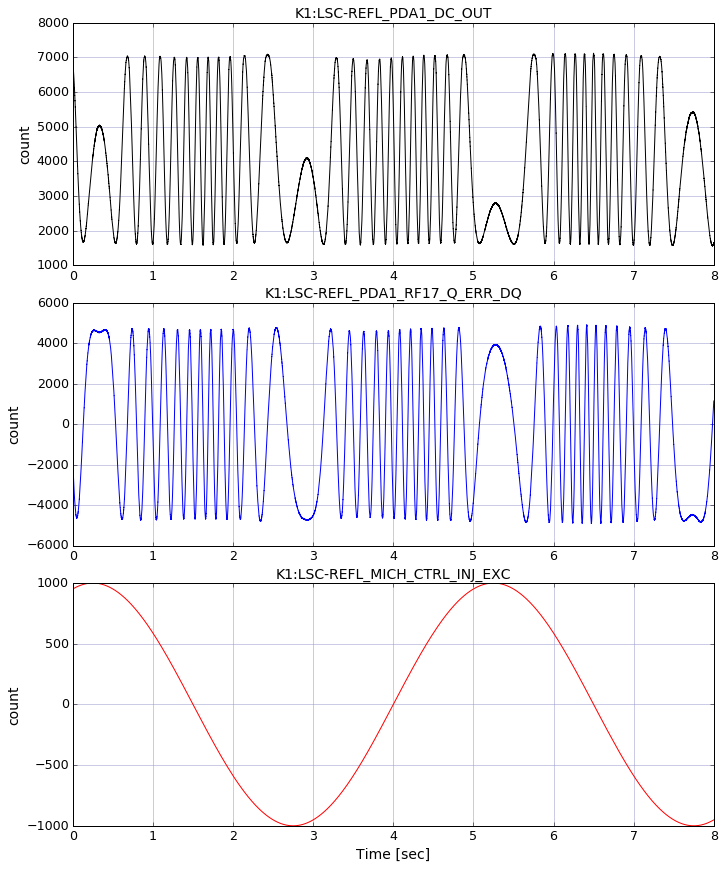

In [24]:
DC = np.loadtxt('data/Fringe/data/REFL-PDA1-DC.txt', comments='#')
RF = np.loadtxt('data/Fringe/data/REFL-PDA1-RF17_Q_ERR.txt', comments='#')
INJ = np.loadtxt('data/Fringe/data/InjectionSignal.txt', comments='#')

t = DC[:,0]
t = t - t[0]
dc = DC[:,1]
rf = RF[:,1]
inj = INJ[:,1]

data = [{'x':t, 'y':dc, 'title':'K1:LSC-REFL_PDA1_DC_OUT','ylabel':'count'},
       {'x':t, 'y':rf, 'title':'K1:LSC-REFL_PDA1_RF17_Q_ERR_DQ','ylabel':'count'},
       {'x':t, 'y':inj, 'title':'K1:LSC-REFL_MICH_CTRL_INJ_EXC','ylabel':'count','xlabel':'Time [sec]'}]
ax=plu.multiPlots(data, size=(10,12), font_scale=0.7)

#### Contrast

In [25]:
Pmax = 7000.
Pmin = 1600.
Contrast = (Pmax - Pmin)/(Pmax + Pmin)
print("Contrast is {0:.3}%".format(100*Contrast))

Contrast is 62.8%


#### Optical gain from the error signal slope

The amplitude of the DC signal Adc:

In [26]:
Adc = Pmax - Pmin

The amplitude of the RF signal Arf:

In [27]:
Arf = np.max(rf)-np.min(rf)

The slope of the signal at the middle fringe is $A/2\cdot 2\pi/\lambda\cdot 2\Delta L=\frac{2\pi A}{\lambda}\Delta L$

In [28]:
wl = 1064*nm #Wave length
Hdc = 2*pi*Adc/wl #Optical Gain measured by the DC signal [cnts/m]
Hrf = 2*pi*Arf/wl #Optical Gain measured by the RF signal [cnts/m]
print("Hdc={0:.3}[cnt/m]\nHrf={1:.3}[cnt/m]".format(Hdc, Hrf))

Hdc=3.19e+10[cnt/m]
Hrf=5.79e+10[cnt/m]


These numbers are consistent with the mid-run optical gain measurements

Hdc=3.25e+10[cnt/m]<BR>
Hrf=5.66e+10[cnt/m]

## Actuator Efficiency

Now we locked the MICH using the DC signal at the middle frindge. 
An excitation signal is injected just before the LSC filter and the transfer function from tge input to the MICH actuator (just after the UGF servo) to the input to the filter (= the error signal) was measured. During this and most of the following measurements, the UGF servo was on hold otherwise noted.

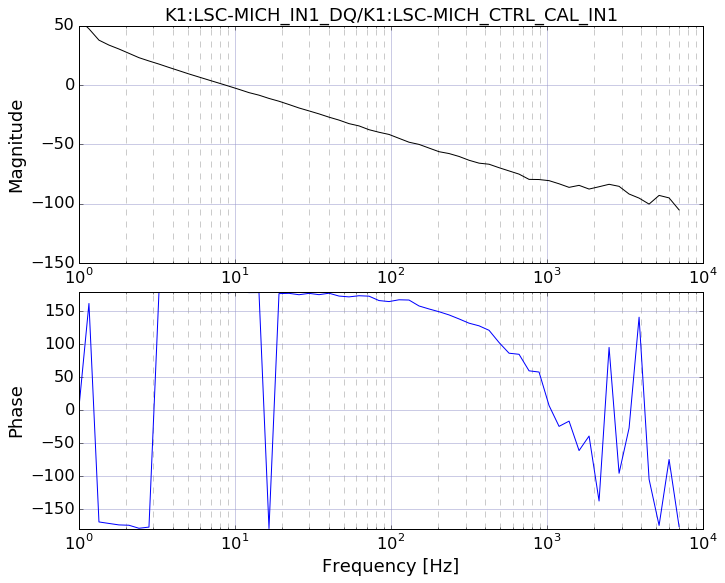

In [29]:
TF=np.loadtxt('data/TFs/Data/DC-Lock-LBW-OPLG.txt', comments='#')
f = TF[:,0]
real = TF[:,3]
imag = TF[:,4]
mag = np.sqrt(real**2+imag**2)
phase = rad2deg(np.angle(1j*imag+real))

data = [{'x':f, 'y':20*np.log10(mag), 'plot_type':'semilogx', 'ylim':[-150,50], 'title':'K1:LSC-MICH_IN1_DQ/K1:LSC-MICH_CTRL_CAL_IN1','ylabel':'Magnitude'},
       {'x':f, 'y':phase, 'plot_type':'semilogx', 'ylim':[-180,180], 'xlabel':'Frequency [Hz]','ylabel':'Phase'}]
ax=plu.multiPlots(data, size=(10,8), font_scale=0.9)

The actuator efficiency at 100Hz is the following.

In [30]:
tf100=np.interp(100,f,mag) #Transfer function magnitude at 100Hz. This is in the unit of [cnt/cnt]
print("Transfer function magnitude at 100Hz is {0:.3}".format(tf100))
#The actuator efficienty at 100Hz can be obtained by dividing tf100 with Hdc
A100 = tf100/Hdc # in the unit of m/cnt
print("Actuation efficiency at 100Hz is {0:.3}[m/cnt]".format(A100))

Transfer function magnitude at 100Hz is 0.00787
Actuation efficiency at 100Hz is 2.47e-13[m/cnt]


The slope of the actuator efficiency should be $\propto 1/f^2$. The actuation efficiency above the resonant frequency of the pendulum ($\simeq$1Hz) can be written $A=\alpha/f^2$.

In [31]:
alpha = A100*100**2 # [m*Hz^2/cnt]
print("Actuation efficiency is {0:.3}/f^2[m/cnt/Hz^2]".format(alpha))

Actuation efficiency is 2.47e-09/f^2[m/cnt/Hz^2]


This is not so consistent with the previous calibration: 2.24e-09/f^2[m/cnt/Hz^2] on 2016/4/19. I will revisit this below.

## RF Optical Gain from actuation efficiency 

Now we have the actuator efficiency. We can measure the RF optical gain by locking the MICH with RF and making a transfer function measurement.

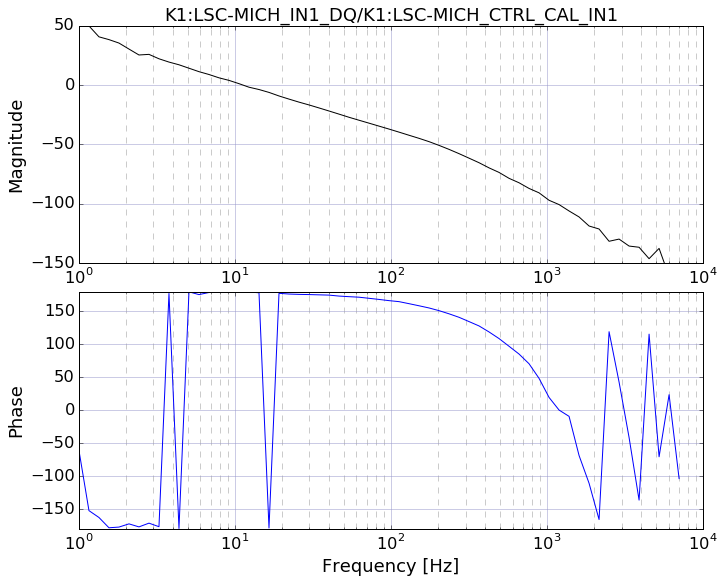

In [32]:
TF=np.loadtxt('data/TFs/Data/RF-Lock-OPLG.txt', comments='#')
f = TF[:,0]
real = TF[:,3]
imag = TF[:,4]
mag = np.sqrt(real**2+imag**2)
phase = rad2deg(np.angle(1j*imag+real))

data = [{'x':f, 'y':20*np.log10(mag), 'plot_type':'semilogx', 'ylim':[-150,50], 'title':'K1:LSC-MICH_IN1_DQ/K1:LSC-MICH_CTRL_CAL_IN1','ylabel':'Magnitude'},
       {'x':f, 'y':phase, 'plot_type':'semilogx', 'ylim':[-180,180], 'xlabel':'Frequency [Hz]','ylabel':'Phase'}]
ax=plu.multiPlots(data, size=(10,8), font_scale=0.9)


The magnitude of this transfer function at 100Hz can be divided by the actuation efficiency at 100Hz to give the RF optical gain.

In [33]:
tf100=np.interp(100,f,mag) #Transfer function magnitude at 100Hz. This is in the unit of [cnt/cnt]
print("Transfer function magnitude at 100Hz is {0:.3}".format(tf100))
Hrf2 = tf100/A100
print("Hrf from the actuation efficiency = {0:.3}[cnt/m]\nHrf from fringe amplitude = {1:.3}[cnt/m]".format(Hrf2,Hrf))

Transfer function magnitude at 100Hz is 0.0134
Hrf from the actuation efficiency = 5.43e+10[cnt/m]
Hrf from fringe amplitude = 5.79e+10[cnt/m]


There is a noticeable discrepancy.

#### Actuation efficiency from the RF lock

Here I will try to calculate the actuation efficiency from the RF fringe calibration and the transfer function measurement with RF lock.

In [34]:
alpha = tf100/Hrf*100**2
print("Actuation efficiency from the RF calibration = {0:.3}/f^2[m/cnt/Hz^2]".format(alpha))

Actuation efficiency from the RF calibration = 2.31e-09/f^2[m/cnt/Hz^2]


The above number is much closer to the number we got on 4/19: 2.24e-09/f^2[m/cnt/Hz^2].

It seems that there was something wrong with the DC lock transfer function measurement. It is not only different from the previous measurement but self inconsistent within the measurements done this time between RF and DC. It is unlikely that the actuation efficiency changes by a large amount during the run. From the RF measurement, we got a similar actuation efficiency as before. For this reason, I will use the actuation efficiency obtained from the RF measurement in the following analysis.

## Open Loop Gain Model

Now we try to make a theoretical model of the open loop gain

### Actuator

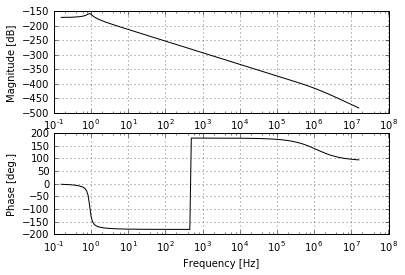

In [35]:
#Actuator model
Pend = ltu.lpf2(fc=0.93,Q=4.85) #Pendulum LTI model
(w,h)=Pend.freqresp(w=2*pi*100) #Pendulum response at 100Hz
Pend = ltu.ltiprod(Pend, alpha/100**2/np.abs(h)) #Correct the gain of the pendulum response

#Coil inductance
Rout = 73 #[Ohm] Coil driver's output resistance
Lc = 10e-6 #[H] Coil inductance ** NEED TO CHECK THIS VALUE **
fc = Rout/Lc/2/pi
Coil = ltu.lpf1(fc=fc)

Act = ltu.ltiprod(Pend, Coil)

(w,h)=ltu.bode(Act)

### Feedback Filters

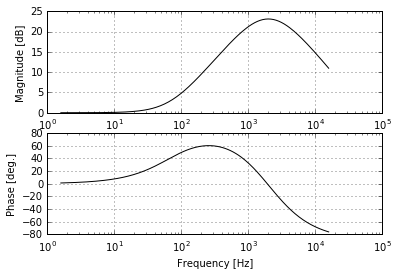

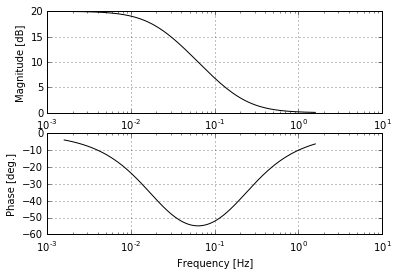

In [36]:
#Feedback filters
LagLead = ltu.ltiprod(ltu.zero(70),ltu.lpf1(fc=2000),ltu.lpf1(fc=2000))
Boost = ltu.ltiprod(ltu.lpf1(fc=0.02),ltu.zero(0.2),10)

MICH_GAIN = 50 #Gain in the K1:LSC-MICH filter bank
UGF_SERVO_GAIN = 1/1.12 #Gain of the UGF Servo

(w,h)=ltu.bode(LagLead)
(w,h)=ltu.bode(Boost)

### DGS filters

The total transfer function of the digital system from the analog AA filter to the analog AI filter is reported [here](http://gwwiki.icrr.u-tokyo.ac.jp/JGWwiki/CLIO/Tasks/DigitalControl/Caltech_setup?action=AttachFile&do=view&target=analog_system_investigation.pdf).

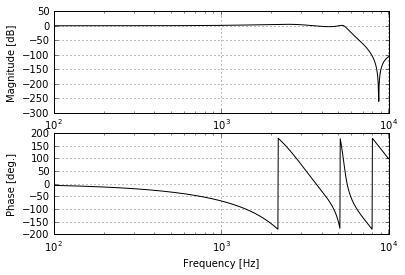

In [37]:
#Time delay in the DGS
Td=70e-6 + 3000.0/3e8 #70usec DGS delay + 3000m light travel time

P0 = ltu.pole2(10.304784e3,1.0159584)
P1 = ltu.pole(51.53319e3)
P2 = ltu.pole(7.8430016e3)
P3 = ltu.pole(346.96389e3)
Z0 = ltu.zero2(67.205279e3,68.668973e6)

AA = ltu.ltiprod(P0,P1,P2,P3,Z0)
AI = ltu.ltiprod(P0,P1,P2,P3,Z0)

P0 = ltu.pole2(2.9126274e3,1.1663357)
Z0 = ltu.zero2(8.7381935e3, 3.7254539e6)
P2 = ltu.pole2(5.3800106e3,8.3770775)
Z2 = ltu.zero2(8.7381935e3, 5.5411258e6)

DAA = ltu.ltiprod(P0,Z0,P2,Z2)
DAI = ltu.ltiprod(P0,Z0,P2,Z2)

DGS = ltu.ltiprod(AA,DAA,DAI,AI)

f = np.logspace(2,4,1000)
a=ltu.bode(DGS, w=f)

### Open Loop Gain

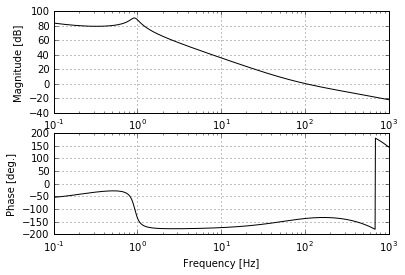

In [38]:
#Open Loop Gain
OPLG = ltu.ltiprod(Act, LagLead, Boost,Hrf,MICH_GAIN,UGF_SERVO_GAIN,DGS) #Open Loop Gain
f = np.logspace(-1,3,1000)
(w,h)=ltu.bode(OPLG,f)

The theoretical open loop transfer function G has the following form.

Open Loop Gain: G(s) =


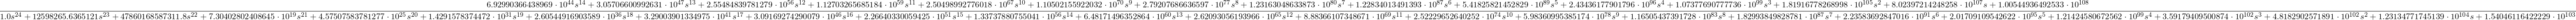

In [66]:
#Open Loop Gain as Rational Function
print('Open Loop Gain: G(s) =')
sp.Poly(OPLG.num, s)/sp.Poly(OPLG.den, s)

In [40]:
print('Time delay is {:.5}usec'.format(Td/1e-6))
print('Multiply the above transfer function with the following to include the time delay.')
sp.exp(-Td*sp.I*s)

Time delay is 80.0usec
Multiply the above transfer function with the following to include the time delay.


## Saturation of the excitation signal

It was found later that the excitation signal was too large and saturated the DAC. Here, we try to include this effect.

The DAC saturates at $2^{16}/2 = 32768$ counts.

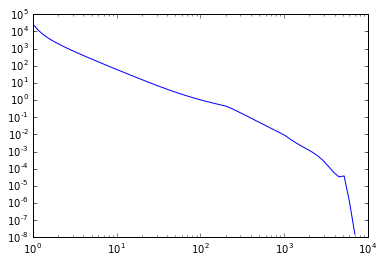

In [77]:
#Load the frequency points to calculate
TF=np.loadtxt('data/TFs/Data/RF-Lock-OPLG.txt', comments='#')
f = TF[:,0]

#Open loop Gain from the excitation injection to DAC
FBFLT = ltu.ltiprod(LagLead, Boost, MICH_GAIN, UGF_SERVO_GAIN)
#Closed loop Gain from the excitation injection to DAC
CLG = ltu.ltiprod(FBFLT, ltu.ltiinv(ltu.ltiadd(OPLG, 1)))
#Excitation voltage (we used the envelope mode of DTT)
excV = np.piecewise(f, [f <=1, (1<f)*(f <= 10), (10<f)*(f <= 1000),(1000<f)*(f <= 5000), 5000<f], 
                 [500, 
                  lambda x: (x-1)*(100.-500.)/9.+500,
                  lambda x: (x-10)*(500.-100.)/(1000.-10.) + 100,
                  lambda x: (x-1000)*(5000.-500.)/(5000.-1000.) + 500,
                  5000])

#Frequency response of the closed loop gain
(w,h) = CLG.freqresp(w=2*pi*f)
#Signal input to DAC
DACSig = np.abs(h)*excV
#DAC input over 2^15 counts will be saturated
SatSig = np.piecewise(DACSig, [DACSig <= 2**15, DACSig > 2**15], 
                 [lambda x: x,
                  2**15])
#Ratio between saturated and non-saturated signals. This is the reduction factor for the measured OPLG.
GainRatio = SatSig/DACSig

#Frequency response of the Open Loop Gain Model
(w, OPLGSat) = OPLG.freqresp(w=2*pi*f)
#Multiply the OPLG with the gain ratio to get the saturated OPLG
OPLGSat = OPLGSat*GainRatio

plt.loglog(f,np.abs(OPLGSat))


## Comparison with the measured Open Loop Gain

Below is the comparison of the model and the measured open loop gain. With the saturation effect taken into account, the model and the measurement agree well except for the phase

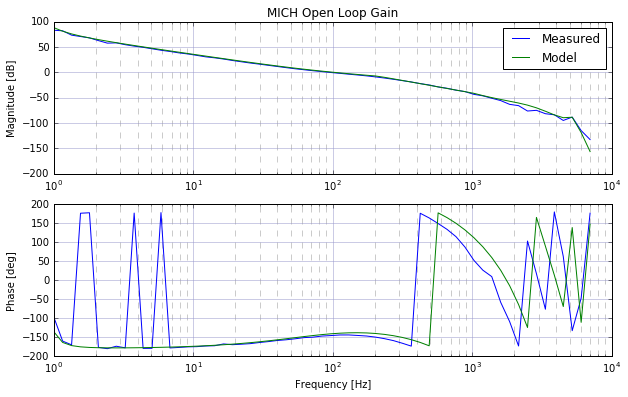

In [79]:
TF=np.loadtxt('data/TFs/Data/RF-Lock-OPLG.txt', comments='#')
f = TF[:,0]
real = TF[:,1]
imag = TF[:,2]
mag1 = np.sqrt(real**2+imag**2)
phase1 = rad2deg(np.angle(-1j*imag-real))

mag2 = np.abs(OPLGSat)
phase2 = rad2deg(np.angle(OPLGSat*np.exp(-2j*pi*f*Td))) #Time delay is explicitly introduced as a phase delay here.


fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.set_axisbelow(True)
ax2.set_axisbelow(True)

ax1.semilogx(f, 20*np.log10(mag1))
ax1.semilogx(f, 20*np.log10(mag2))
ax2.semilogx(f,phase1)
ax2.semilogx(f,phase2)

ax1.grid(True, color=(0.6,0.6,0.8),ls='-')
ax1.grid(True, which='minor', color=(0.6,0.6,0.6),ls='--')
ax2.grid(True, color=(0.6,0.6,0.8),ls='-')
ax2.grid(True, which='minor', color=(0.6,0.6,0.6),ls='--')

ax1.set_ylabel('Magnitude [dB]')
ax2.set_ylabel('Phase [deg]')
ax2.set_xlabel('Frequency [Hz]')

ax1.legend(['Measured','Model'])

ax1.set_title('MICH Open Loop Gain')
fig.set_size_inches(10,6,forward=True)

### Extra time delay 

By adding extra time delay of $130\mu \mathrm{s}$, the phase difference can be accounted for. 

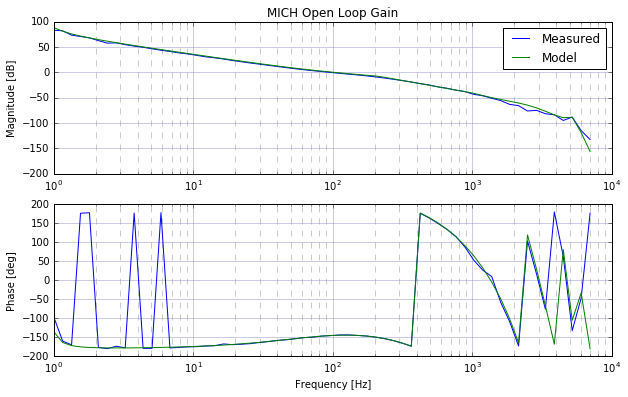

In [82]:
TdExtra = 130e-6

TF=np.loadtxt('data/TFs/Data/RF-Lock-OPLG.txt', comments='#')
f = TF[:,0]
real = TF[:,1]
imag = TF[:,2]
mag1 = np.sqrt(real**2+imag**2)
phase1 = rad2deg(np.angle(-1j*imag-real))

mag2 = np.abs(OPLGSat)
phase2 = rad2deg(np.angle(OPLGSat*np.exp(-2j*pi*f*(Td+TdExtra)))) #Time delay is explicitly introduced as a phase delay here.


fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.set_axisbelow(True)
ax2.set_axisbelow(True)

ax1.semilogx(f, 20*np.log10(mag1))
ax1.semilogx(f, 20*np.log10(mag2))
ax2.semilogx(f,phase1)
ax2.semilogx(f,phase2)

ax1.grid(True, color=(0.6,0.6,0.8),ls='-')
ax1.grid(True, which='minor', color=(0.6,0.6,0.6),ls='--')
ax2.grid(True, color=(0.6,0.6,0.8),ls='-')
ax2.grid(True, which='minor', color=(0.6,0.6,0.6),ls='--')

ax1.set_ylabel('Magnitude [dB]')
ax2.set_ylabel('Phase [deg]')
ax2.set_xlabel('Frequency [Hz]')

ax1.legend(['Measured','Model'])

ax1.set_title('MICH Open Loop Gain')
fig.set_size_inches(10,6,forward=True)

## Generation of h(t)

h(t) can be generated either from the error signal e(t) or from the feedback signal f(t).
From the error signal, the calbration filter is 
$$h(t) = \frac{1}{H}\frac{1+G}{1}\frac{e(t)}{L}$$

,where $L$ is the arm length, $G$ is the open loop gain, $H$ is the optical gain.

From the feedback signal, the calibration filter is

$$h(t) = A\frac{1+G}{G}\frac{f(t)}{L}$$

,where $A$ is the actuator efficiency.

/home/aso/anaconda2/lib/python2.7/site-packages/scipy/signal/filter_design.py:1057: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


C_err(s) = 


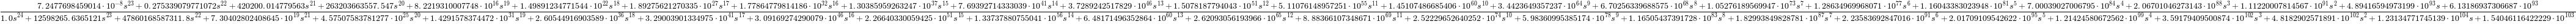

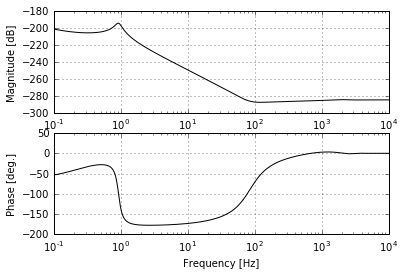

In [42]:
#The arm length
L = 3000.

#Calibration filter for the error signal
C_err = ltu.ltiprod(ltu.ltiadd(OPLG,1),1/Hrf/L)

f = np.logspace(-1,4,1000)
a=ltu.bode(C_err,f)
print("C_err(s) = ")
sp.Poly(C_err.num, s)/sp.Poly(C_err.den, s)

#print("Numerator = {0}".format(C_err.num))
#print("Denominator = {0}".format(C_err.den))

C_fb(s) = 


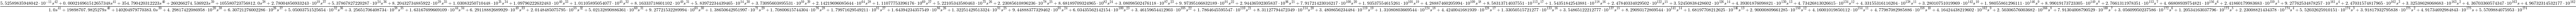

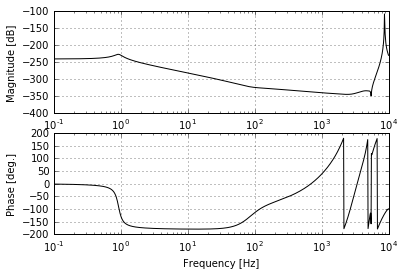

In [43]:
#Calibration filter for the error signal
C_fb = ltu.ltiprod(ltu.ltiadd(OPLG,1),ltu.ltiinv(OPLG),Act,1/L)

f = np.logspace(-1,4,1000)
a=ltu.bode(C_fb,f)
print("C_fb(s) = ")
sp.Poly(C_fb.num, s)/sp.Poly(C_fb.den, s)

## ETM individual actuation efficiency

We also wanted to check the actuation efficiency of individual ETM. To do so, we first locked MICH with low UGF (around 10Hz). The open loop gain of this lock is shown below.Around 100Hz, the open loop gain is low enough that the feedback will not affect the actuation efficiency measurement.

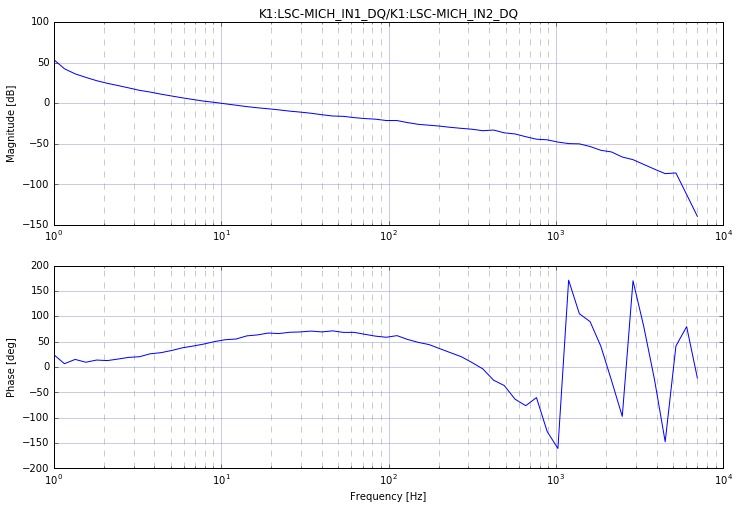

In [49]:
TF=np.loadtxt('data/TFs/Data/RF-Lock-LBW-OPLG.txt', comments='#')
f = TF[:,0]
real = TF[:,1]
imag = TF[:,2]
mag = np.sqrt(real**2+imag**2)
phase = rad2deg(np.angle(1j*imag+real))

fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.set_axisbelow(True)
ax2.set_axisbelow(True)

ax1.semilogx(f, 20*np.log10(mag))
ax2.semilogx(f,phase)

ax1.grid(True, color=(0.6,0.6,0.8),ls='-')
ax1.grid(True, which='minor', color=(0.6,0.6,0.6),ls='--')
ax2.grid(True, color=(0.6,0.6,0.8),ls='-')
ax2.grid(True, which='minor', color=(0.6,0.6,0.6),ls='--')

ax1.set_ylabel('Magnitude [dB]')
ax2.set_ylabel('Phase [deg]')
ax2.set_xlabel('Frequency [Hz]')


ax1.set_title('K1:LSC-MICH_IN1_DQ/K1:LSC-MICH_IN2_DQ')
fig.set_size_inches(12,8,forward=True)

Now we injected a signal to ETMX and measured the transfer function to the MICH RF signal output. By dividing this with the RF optical gain, we can compute the actuation efficiency of ETMX. Note that this calculation does not take into account the open loop gain. So the values at low frequencies (below 10Hz) is inaccurate. 

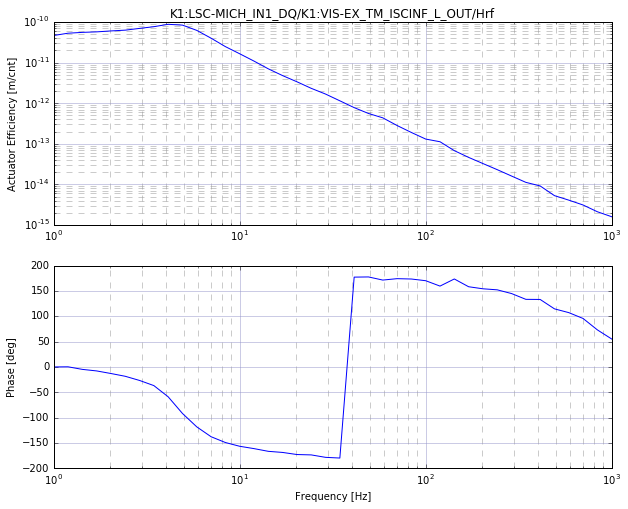

In [50]:
TF=np.loadtxt('data/TFs/Data/RF-Lock-LBW-ETMX.txt', comments='#')
f = TF[:,0]
real = TF[:,1]
imag = TF[:,2]
mag = np.sqrt(real**2+imag**2)/Hrf
phase = rad2deg(np.angle(1j*imag+real))

fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.set_axisbelow(True)
ax2.set_axisbelow(True)

ax1.loglog(f, mag)
ax2.semilogx(f,phase)

ax1.grid(True, color=(0.6,0.6,0.8),ls='-')
ax1.grid(True, which='minor', color=(0.6,0.6,0.6),ls='--')
ax2.grid(True, color=(0.6,0.6,0.8),ls='-')
ax2.grid(True, which='minor', color=(0.6,0.6,0.6),ls='--')

ax1.set_ylabel('Actuator Efficiency [m/cnt]')
ax2.set_ylabel('Phase [deg]')
ax2.set_xlabel('Frequency [Hz]')


ax1.set_title('K1:LSC-MICH_IN1_DQ/K1:VIS-EX_TM_ISCINF_L_OUT/Hrf')
fig.set_size_inches(10,8,forward=True)

We did the same measurement for ETMY

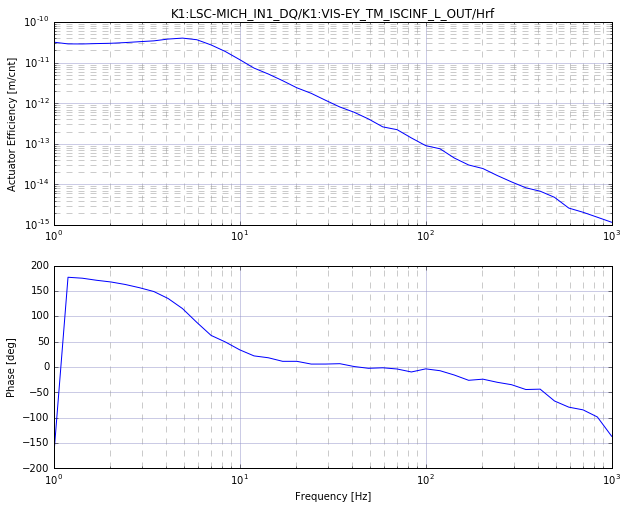

In [51]:
TF=np.loadtxt('data/TFs/Data/RF-Lock-LBW-ETMY.txt', comments='#')
f = TF[:,0]
real = TF[:,1]
imag = TF[:,2]
mag = np.sqrt(real**2+imag**2)/Hrf
phase = rad2deg(np.angle(1j*imag+real))

fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.set_axisbelow(True)
ax2.set_axisbelow(True)

ax1.loglog(f, mag)
ax2.semilogx(f,phase)

ax1.grid(True, color=(0.6,0.6,0.8),ls='-')
ax1.grid(True, which='minor', color=(0.6,0.6,0.6),ls='--')
ax2.grid(True, color=(0.6,0.6,0.8),ls='-')
ax2.grid(True, which='minor', color=(0.6,0.6,0.6),ls='--')

ax1.set_ylabel('Actuator Efficiency [m/cnt]')
ax2.set_ylabel('Phase [deg]')
ax2.set_xlabel('Frequency [Hz]')


ax1.set_title('K1:LSC-MICH_IN1_DQ/K1:VIS-EY_TM_ISCINF_L_OUT/Hrf')
fig.set_size_inches(10,8,forward=True)

From the above measurements, the mysterious LFP around 400Hz is not present. The transfer function 